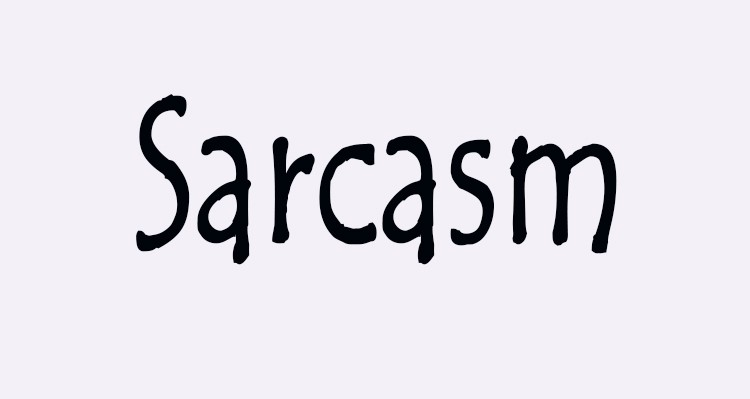

**Introduction**

Word **Sarcasm** oftenly defined as cutting ,ironic remark intended to express comtempt. 

***Sarcasm Detection** is the classification task for the correct labelling as 'sarcastic' or 'non-sarcastic'. It's a challanging task in text clasiification without knowing the facial expressions and with lack of information.

In Natural Language Processing recognizing sarcasm in text is an important task to avoid misinterpretation of sarcastic statements as literal statements. 

For example, a sentence like **''So thrilled to be on call for work the entire weekend!''** could be naively classified as a sentence with a high positive sentiment. However, its actually the negative sentiment that is cleverly implied through sarcasm. 

The use of sarcasm is prevalent across all social media, micro-blogging and e-commerce platforms. Sarcasm detection is imperative for accurate sentiment analysis and opinion mining. It could contribute to enhanced automated feedback systems in the context of customer based sites. Twitter is a micro-blogging platform extensively used by people to express thoughts, reviews, discussions on current events and convey information in the form of short texts. Twitter data provides a diverse corpus for sentences which implicitly contain sarcasm. The target is to train a machine-learning algorithm so that it can predict where sarcasm will appear in future.


**Dataset Information**

Each record consists of three attributes:

is_sarcastic: 1 if the record is sarcastic otherwise 0

headline: the headline of the news article

article_link: link to the original news article. Useful in collecting supplementary data


**Problem Statement**

Can you identify sarcastic sentences? Can you distinguish between fake news and legitimate news?

# **Predicting Sarcasm in Text Part 1**

## it_nltmapdj_02_enus_06

*What you will learn and explore in this section*:-

- Installation of Libraries
- Importing required Libraries
- Library component and Usecases by each component and explanation

In [7]:
%pip install contractions #fixes contractions such as 'you're' to you 'are'

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#fixes'


In [8]:
# Supporting scientific library
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Visulization Library
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import graph_objs as go #This package imports definitions for all of plotly's graph objects.
import plotly.express as px #The ploty.express module contains functions that can create entire figures at once,
# and is referred to as Plotly Express or PX.

# Text Pre-processing Libraries
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.tokenize import word_tokenize
import contractions
from nltk.stem import SnowballStemmer

#perfprmance and train test split
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score

# Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier


In [9]:
# Unzipping the folder
# !unzip /content/Course_4_scarcsm data.zip

### Data Loading

In [10]:
data = pd.read_json('https://raw.githubusercontent.com/rishabhmisra/News-Headlines-Dataset-For-Sarcasm-Detection/master/Sarcasm_Headlines_Dataset.json',lines=True)

In [11]:
data.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


### Data Description

In [12]:
print(data.info())
print('------------------[Data Description]--------------------')
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB
None
------------------[Data Description]--------------------
       is_sarcastic
count  28619.000000
mean       0.476397
std        0.499451
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000


### Checking NAN Values

In [13]:
print("Null Values\n",data.isnull().sum())
print("\nData Shape: " , data.shape)

Null Values
 is_sarcastic    0
headline        0
article_link    0
dtype: int64

Data Shape:  (28619, 3)


Observation

- There is no NULL values
- We have 3 columns and approximately 28K rows

In [14]:
data.is_sarcastic.value_counts()

is_sarcastic
0    14985
1    13634
Name: count, dtype: int64

### Number of words in headlines

In [15]:
# Let's check number of words in the given dataset

def number_of_words(data):
    WL = []
    list_of_words = data.str.split()
    for i in range(len(list_of_words)):
        for j in range(len(list_of_words[i])):
            WL.append(list_of_words[i][j])
            
    set_of_words = set(WL)
    
    print(len(set_of_words),len(WL))

number_of_words(data.headline)

38234 287620


### Article link preprocessing

In [16]:
data['web'] = data['article_link'].apply(lambda x: x.split('.')[1])
data = data.drop('article_link' , axis = 1)
data.head()

,is_sarcastic,headline,web
0,1,thirtysomething scientists unveil doomsday clo...,theonion
1,0,dem rep. totally nails why congress is falling...,huffingtonpost
2,0,eat your veggies: 9 deliciously different recipes,huffingtonpost
3,1,inclement weather prevents liar from getting t...,theonion
4,1,mother comes pretty close to using word 'strea...,theonion


# **Predicting Sarcasm in Text Part 2**

## it_nltmapdj_02_enus_07

### Exploratory Data Analysis (EDA) of Data

#### is_scarstic Analysis

is_sarcastic
0    14985
1    13634
Name: count, dtype: int64 

------------------[IS_SARCASTIC ANALYSIS]-------------------


c:\Users\nukes\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nukes\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\nukes\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 0, 'Target')

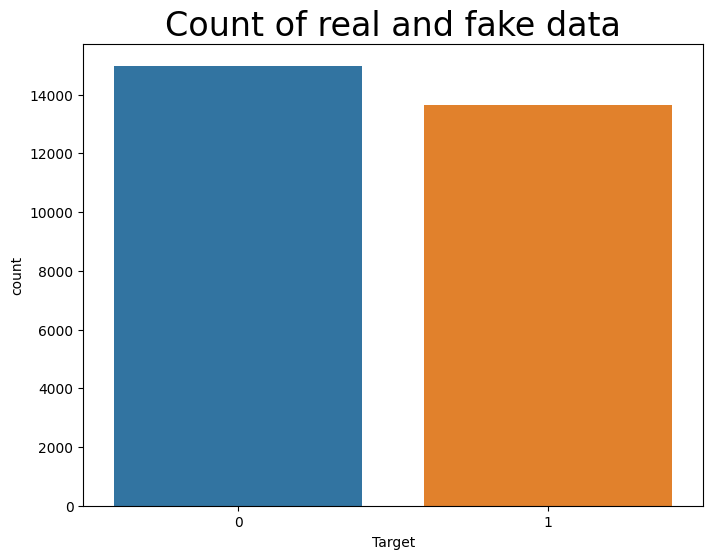

In [17]:
print(data.is_sarcastic.value_counts() ,"\n")

print('------------------[IS_SARCASTIC ANALYSIS]-------------------')

target_counts=data['is_sarcastic'].value_counts()
plt.figure(figsize = (8,6))
sns.barplot(y=target_counts,x=target_counts.index)
plt.title("Count of real and fake data",fontsize = 24)
plt.ylabel('count')
plt.xlabel('Target')

In [18]:
px.pie(data,names='is_sarcastic',labels=['Sarcastic','Acclaim'],title='Sarcasam Vs Acclaim',template='plotly_white')

#### Web link Analysis

c:\Users\nukes\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\nukes\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\nukes\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\nukes\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



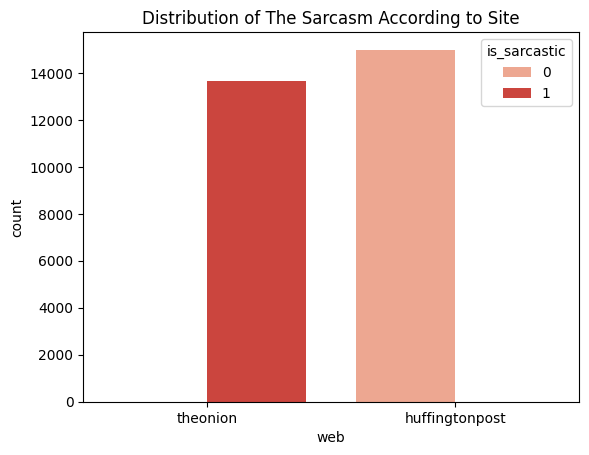

In [19]:
ax = sns.countplot(x="web",  hue='is_sarcastic', data=data, palette="Reds")
plt.title("Distribution of The Sarcasm According to Site");

In [20]:
data['message_len'] = data['headline'].apply(lambda x: len(x.split(' ')))
data.head()

,is_sarcastic,headline,web,message_len
0,1,thirtysomething scientists unveil doomsday clo...,theonion,8
1,0,dem rep. totally nails why congress is falling...,huffingtonpost,13
2,0,eat your veggies: 9 deliciously different recipes,huffingtonpost,7
3,1,inclement weather prevents liar from getting t...,theonion,8
4,1,mother comes pretty close to using word 'strea...,theonion,9


In [21]:
sarcastic_data = data[data['is_sarcastic'] == 1]['message_len'].value_counts().sort_index()
not_sarcastic_data = data[data['is_sarcastic'] == 0]['message_len'].value_counts().sort_index()

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=sarcastic_data.index,
    y=sarcastic_data.values,
    name='Sarcastic',
    fill='tozeroy',
    marker_color='#202024',
))
fig.add_trace(go.Scatter(
    x=not_sarcastic_data.index,
    y=not_sarcastic_data.values,
    name='Acclaim',
    fill='tozeroy',
    marker_color='#815836',
))
fig.update_layout(
    title='<span style="font-size:32px; font-family:Times New Roman">Data Roles according to Labels</span>'
)
fig.update_xaxes(range=[0, 50])
fig.show()

# **Predicting Sarcasm in Text 3**

## it_nltmapdj_02_enus_08

### Pre-processing using Regex

In [22]:
data['headline']=data['headline'].str.lower()
# Code to remove the Hashtags from the text
data['headline']=data['headline'].apply(lambda x:re.sub(r'\B#\S+','',x))
# Code to remove the links from the text
data['headline']=data['headline'].apply(lambda x:re.sub(r"http\S+", "", x))
# Code to remove the Special characters from the text 
data['headline']=data['headline'].apply(lambda x:' '.join(re.findall(r'\w+', x)))
# Code to substitute the multiple spaces with single spaces
data['headline']=data['headline'].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
# Code to remove all the single characters in the text
data['headline']=data['headline'].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
# Remove the twitter handlers
data['headline']=data['headline'].apply(lambda x:re.sub('@[^\s]+','',x))

# **Predicting Sarcasm in Text 4**

## it_nltmapdj_02_enus_09

In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nukes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Preprocessing -  Stop word removal

In [24]:
stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text
    
data['headline_clean'] = data['headline'].apply(remove_stopwords)
data.head()

,is_sarcastic,headline,web,message_len,headline_clean
0,1,thirtysomething scientists unveil doomsday clo...,theonion,8,thirtysomething scientists unveil doomsday clo...
1,0,dem rep totally nails why congress is falling ...,huffingtonpost,13,dem rep totally nails congress falling short g...
2,0,eat your veggies 9 deliciously different recipes,huffingtonpost,7,eat veggies 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...,theonion,8,inclement weather prevents liar getting work
4,1,mother comes pretty close to using word stream...,theonion,9,mother comes pretty close using word streaming...


### Preprocessing - Tokenization

In [25]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

data['tokenized'] = data['headline_clean'].apply(lambda x: tokenization(x.lower()))
data.head()

,is_sarcastic,headline,web,message_len,headline_clean,tokenized
0,1,thirtysomething scientists unveil doomsday clo...,theonion,8,thirtysomething scientists unveil doomsday clo...,"[thirtysomething, scientists, unveil, doomsday..."
1,0,dem rep totally nails why congress is falling ...,huffingtonpost,13,dem rep totally nails congress falling short g...,"[dem, rep, totally, nails, congress, falling, ..."
2,0,eat your veggies 9 deliciously different recipes,huffingtonpost,7,eat veggies 9 deliciously different recipes,"[eat, veggies, 9, deliciously, different, reci..."
3,1,inclement weather prevents liar from getting t...,theonion,8,inclement weather prevents liar getting work,"[inclement, weather, prevents, liar, getting, ..."
4,1,mother comes pretty close to using word stream...,theonion,9,mother comes pretty close using word streaming...,"[mother, comes, pretty, close, using, word, st..."


In [26]:
sarcastic = data[data['is_sarcastic']==0]['headline_clean']
sarcastic[:10]

1     dem rep totally nails congress falling short g...
2           eat veggies 9 deliciously different recipes
5                                     white inheritance
6                         5 ways file taxes less stress
9                            lots parents know scenario
10         lesbian consideredfather indiana amazing one
11          amanda peet told daughter sex isspecial hug
12              know regarding current treatments ebola
13    chris christie suggests hillary clinton blame ...
15    uber ceo travis kalanick stepping trump econom...
Name: headline_clean, dtype: object

In [27]:
not_sarcastic = data[data['is_sarcastic']==1]['headline_clean']
not_sarcastic[:10]

0     thirtysomething scientists unveil doomsday clo...
3          inclement weather prevents liar getting work
4     mother comes pretty close using word streaming...
7     richard bransonglobal warming donation nearly ...
8     shadow government getting large meet marriott ...
14           ford develops new suv runs purely gasoline
16    area boy enters jumping touching tops doorways...
17                            area man traveling gurney
21    guard video game strict orders repeatedly pace...
25     secret service agent secret david alan grier fan
Name: headline_clean, dtype: object

### Preprocessing - Stemming

In [28]:
stemmer = nltk.SnowballStemmer("english")

def stemm_text(text):
    text = ' '.join(stemmer.stem(word) for word in text.split(' '))
    return text

data['headline_clean'] = data['headline_clean'].apply(stemm_text)
data.head()

,is_sarcastic,headline,web,message_len,headline_clean,tokenized
0,1,thirtysomething scientists unveil doomsday clo...,theonion,8,thirtysometh scientist unveil doomsday clock h...,"[thirtysomething, scientists, unveil, doomsday..."
1,0,dem rep totally nails why congress is falling ...,huffingtonpost,13,dem rep total nail congress fall short gender ...,"[dem, rep, totally, nails, congress, falling, ..."
2,0,eat your veggies 9 deliciously different recipes,huffingtonpost,7,eat veggi 9 delici differ recip,"[eat, veggies, 9, deliciously, different, reci..."
3,1,inclement weather prevents liar from getting t...,theonion,8,inclement weather prevent liar get work,"[inclement, weather, prevents, liar, getting, ..."
4,1,mother comes pretty close to using word stream...,theonion,9,mother come pretti close use word stream correct,"[mother, comes, pretty, close, using, word, st..."


### Word Cloud

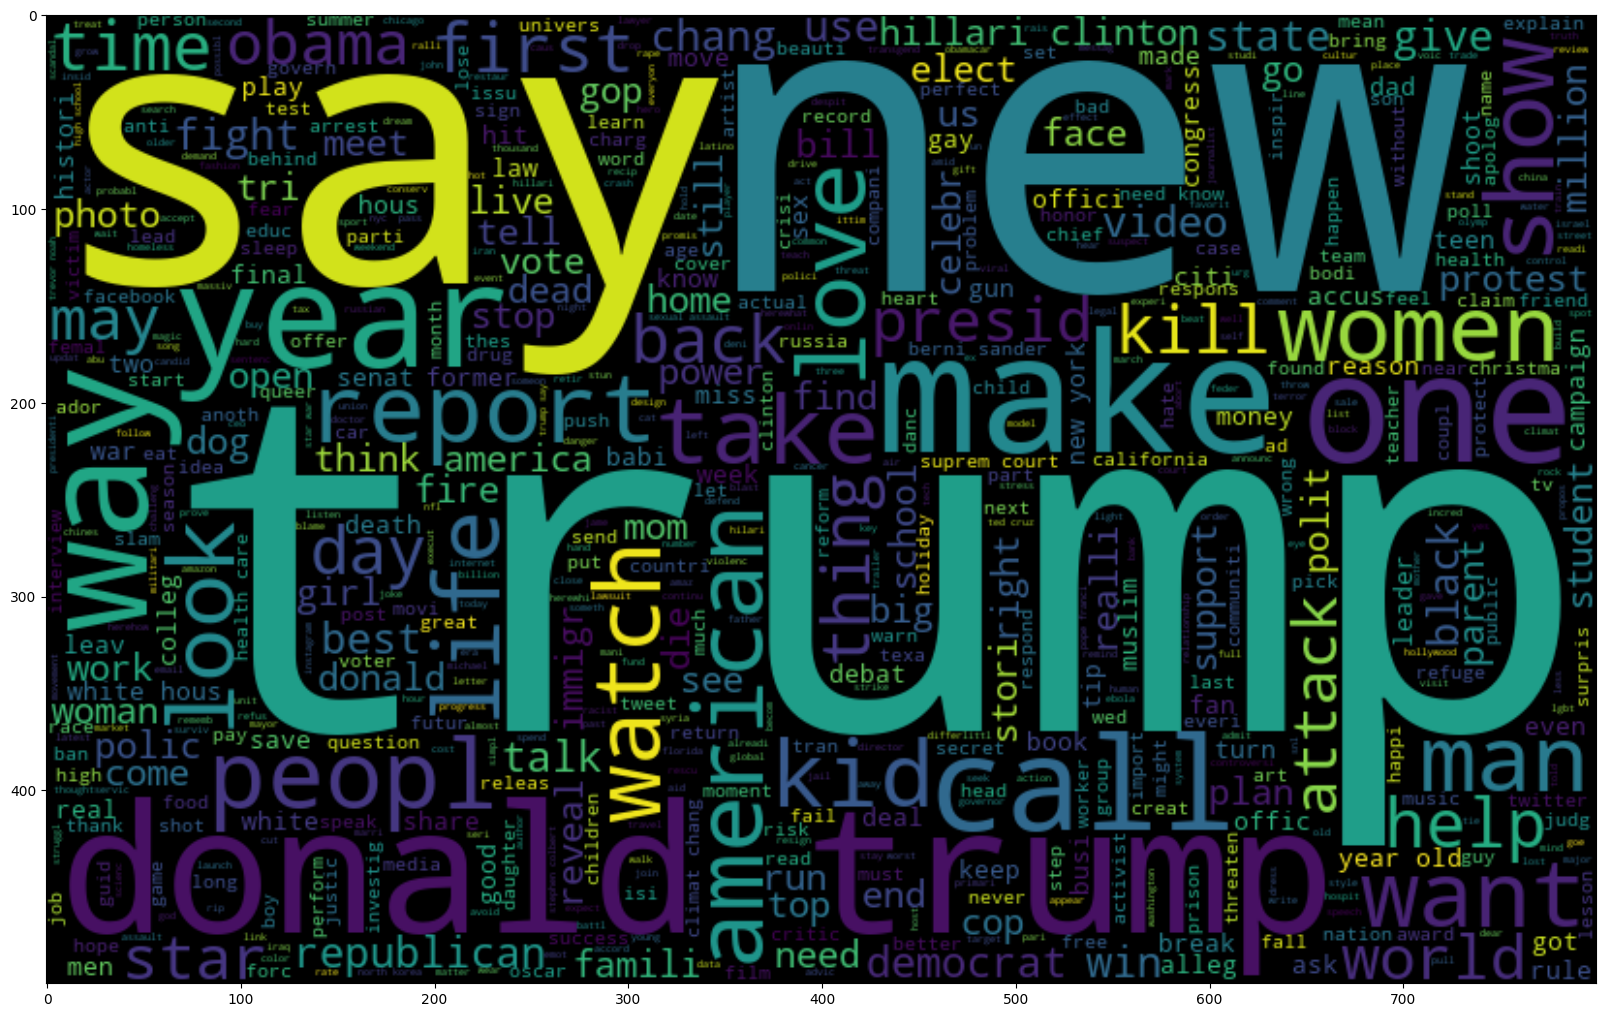

In [29]:
plt.figure(figsize = (20,20)) # Text that is Not Sarcastic
wc = WordCloud(max_words = 1500 , width = 800 , height = 500).generate(" ".join(data[data.is_sarcastic == 0].headline_clean))
plt.imshow(wc , interpolation = 'bilinear')

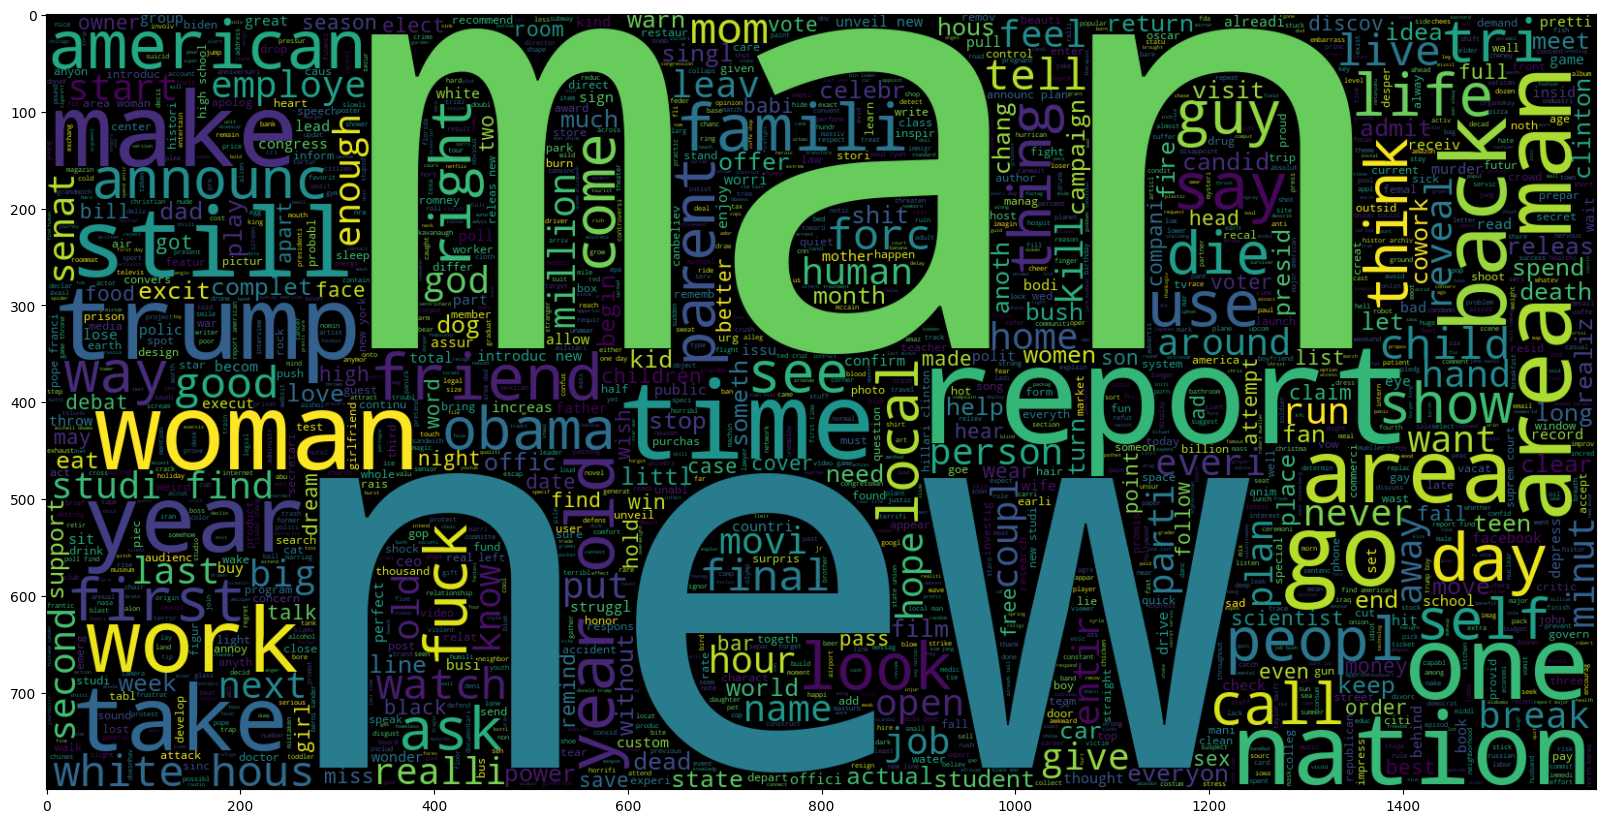

In [30]:
plt.figure(figsize = (20,20)) # Text that is Sarcastic
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data[data.is_sarcastic == 1].headline_clean))
plt.imshow(wc , interpolation = 'bilinear')

### 100 MOST FREQUENTLY OCCURING WORDS

In [31]:
all_words=[]
for i in range(len(data['tokenized'])):
    a=data['tokenized'][i]
    for i in a:
        all_words.append(i)
all_words=pd.Series(np.array(all_words))
print(all_words)

0         thirtysomething
1              scientists
2                  unveil
3                doomsday
4                   clock
               ...       
204694             palace
204695                dad
204696          clarifies
204697            notfood
204698               stop
Length: 204699, dtype: object


In [32]:
# !pip install plotly
# !pip install --upgrade plotly
# !pip uninstall plotly

In [33]:
common_words=all_words.value_counts()[:100].rename_axis('Common Words').reset_index(name='count')
common_words
fig = px.treemap(common_words, values='count',template= "plotly_white",
                 title='100 Most Common Words In Headline', path = [px.Constant('common words')])
fig.show()

# **Predicting Sarcasm in Text 5**

#it_nltmapdj_02_enus_10

### Train - Test Split

In [34]:
#Spliting it into training and testing 
X = data['headline_clean']
y = data['is_sarcastic']


# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,random_state=42)
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

22895 22895
5724 5724


### Vector Conversion

In [35]:
cv = CountVectorizer(ngram_range=(1,3))
X_cv_train = cv.fit_transform(x_train)
X_cv_test = cv.transform(x_test)

### Decision Tree Model

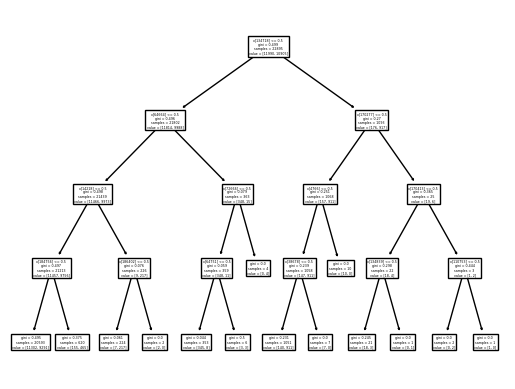

In [36]:
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree_model.fit(X_cv_train, y_train)

from sklearn import tree
tree.plot_tree(tree_model)
plt.savefig('DT.pdf')
plt.show()

In [37]:
y_pred = tree_model.predict(X_cv_test)
test = np.array(y_test)
predictions = np.array(y_pred)
confusion_matrix(test, predictions)

print('accuracy:', accuracy_score(y_test,y_pred))
print('f1-score:', f1_score(y_test,y_pred))

acc_tree = accuracy_score(y_test,y_pred)

accuracy: 0.5787910552061496
f1-score: 0.24585548952142633


### Logistic Regression Model

In [38]:
logreg = LogisticRegression()
logreg.fit(X_cv_train, y_train)

LogisticRegression()

In [39]:
logreg.score(X_cv_train, y_train)

0.9987770255514304

In [40]:
y_pred_logr = logreg.predict(X_cv_test)
print('accuracy:', accuracy_score(y_test,y_pred_logr))
print('f1-score:', f1_score(y_test,y_pred_logr))

acc_logr = accuracy_score(y_test,y_pred_logr)

accuracy: 0.790356394129979
f1-score: 0.7679814385150814


### SVM model

In [41]:
model = svm.SVC(kernel='linear', gamma=1) 
model.fit(X_cv_train, y_train)

SVC(gamma=1, kernel='linear')

In [42]:
model.score(X_cv_train, y_train)

0.999912644682245

In [43]:
y_pred_svm= model.predict(X_cv_test)
print('accuracy:', accuracy_score(y_test,y_pred_svm))
print('f1-score:', f1_score(y_test,y_pred_svm))

acc_svm = accuracy_score(y_test,y_pred_svm)

accuracy: 0.7914046121593291
f1-score: 0.7668879344006247


### Random Forest model

In [44]:
forest = RandomForestClassifier (criterion='gini',
                                n_estimators=12, 
                                random_state=1)
forest.fit(X_cv_train, y_train)

RandomForestClassifier(n_estimators=12, random_state=1)

In [45]:
forest.score(X_cv_train, y_train)

0.9832277789910461

In [46]:
y_pred_forest= forest.predict(X_cv_test)
print('accuracy:', accuracy_score(y_test,y_pred_forest))
print('f1-score:', f1_score(y_test,y_pred_forest))

acc_rf = accuracy_score(y_test,y_pred_forest)

accuracy: 0.7064989517819706
f1-score: 0.6105702364394993


### Naive Bayes model

In [47]:
nb=MultinomialNB()
nb.fit(X_cv_train, y_train)

MultinomialNB()

In [48]:
nb.score(X_cv_train, y_train)

0.9976414064206158

In [49]:
y_pred_nb= nb.predict(X_cv_test)
print('accuracy:', accuracy_score(y_test,y_pred_nb))
print('f1-score:', f1_score(y_test,y_pred_nb))

acc_nb = accuracy_score(y_test,y_pred_nb)

accuracy: 0.8004891684136967
f1-score: 0.7970859985785358


In [50]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80      2995
           1       0.77      0.82      0.80      2729

    accuracy                           0.80      5724
   macro avg       0.80      0.80      0.80      5724
weighted avg       0.80      0.80      0.80      5724



### KNN model

In [51]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_cv_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [52]:
y_pred_knn= knn.predict(X_cv_test)
print('accuracy:', accuracy_score(y_test,y_pred_knn))
print('f1-score:', f1_score(y_test,y_pred_knn))

accuracy: 0.5501397624039134
f1-score: 0.15212380638788275


In [53]:
acc_knn = accuracy_score(y_test,y_pred_knn)

comparison of models

In [54]:
models = ['DesicionTree','LogReg','SVM', 'RandomForest', 'NaiveBayes', 'kNN']
col = [acc_tree, acc_logr, acc_svm, acc_rf, acc_nb, acc_knn]
data = {'Models':models,'Accuracy':col}
graph_df = pd.DataFrame(data)
graph_df

,Models,Accuracy
0,DesicionTree,0.578791
1,LogReg,0.790356
2,SVM,0.791405
3,RandomForest,0.706499
4,NaiveBayes,0.800489
5,kNN,0.550140


In [55]:
graph_df = graph_df.sort_values(by=['Accuracy'], axis = 0, ascending=False)

c:\Users\nukes\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\nukes\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\nukes\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



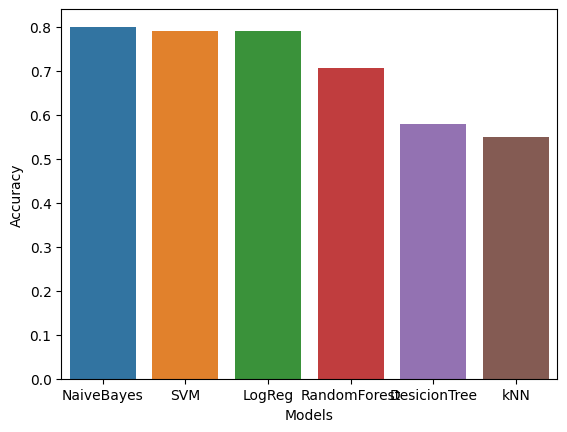

In [56]:
fig, ax = plt.subplots()
sns.barplot(x=graph_df['Models'], y=graph_df['Accuracy'], data=graph_df);